# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Data Cleaning</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● encoding of the last column says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if theydid not show up.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In [14]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### General Propertie:

In [15]:
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In [16]:
df.shape

(110527, 14)

#### Data has 14 column and 110527 entries
#### and we have data about:
##### - every patients:
gender, age, schoarship, hypertention, diabetes, alcoholism, handcap, reseving sms, Attending the appointment, Scheduled Day, Appointment Day

#### There is a misspelled cell name and another name that may lead to misunderstanding 

In [17]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [18]:
print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


#### The above two cells showing  that there is no missing data

In [19]:
sum(df.duplicated())

0

#### The above two cells showing  that there is no missing data

#### There are no duplication at the entire row level 
#### but There may be duplication at the level of patients, where the patient may have booked more than one appointment at different times, places and attended that appointment or did not attend it.
#### the following cells try to make sure that there are duplication at the level of patients and other variables:

In [20]:
sum(df.duplicated(['PatientId']))

48228

In [21]:
sum(df.duplicated(['PatientId','No-show']))

38710

In [22]:
sum(df.duplicated(['PatientId','Neighbourhood','No-show']))

38710

In [23]:
sum(df.duplicated(['PatientId','ScheduledDay','No-show']))

1305

In [24]:
sum(df.duplicated(['PatientId','AppointmentDay','No-show']))

7378

#### There is a duplication at the Patient and No-show columns level 
#### This duplication is varies according to the day of booking and the date of making the reservation, not the place of reservation. 

In [25]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### The descriptive statistics of the data show that there is an error in entering the data in the age column 

<a id='eda'></a>
## Data Cleaning 

### Renaming column and values

In [26]:
df.rename(columns={'No-show': 'attendance', 'Hipertension':'Hypertension'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,attendance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Rename the column to avoid misunderstanding from No-show to attendance

In [27]:
df["attendance"].replace({"No": "finished", "Yes": "not_came"}, inplace=True)
df.head(20)      

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,attendance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,finished
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,finished
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,finished
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,finished
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,finished
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,finished
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,not_came
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,not_came
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,finished
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,finished


#### Rename values to avoid misunderstanding No = finished , Yes= not_came

### Dealing with duplicates and   unnecessary data

In [28]:
df.drop_duplicates(['PatientId','AppointmentDay','attendance'], inplace=True)
df.shape

(103149, 14)

#### delete data with the same values of PatientId, AppointmentDay, No-show = attendance

In [29]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay'], axis = 1, inplace=True)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,attendance
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,finished
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,finished
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,finished
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,finished
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,finished


#### Delete unnecessary columns in the current investigation

### Dealing with errors in entering

In [30]:
df.Age.value_counts()[-1]

1

In [31]:
mask=df.query('Age== -1')
mask

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,attendance
99832,F,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,finished


In [32]:
df.drop(index=99832, inplace=True)

In [33]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,103148.000000,103148.000000,103148.000000,103148.000000,103148.000000,103148.000000,103148.000000
mean,37.052139,0.097685,0.198433,0.072614,0.027776,0.021745,0.333773
std,23.209955,0.296890,0.398822,0.259503,0.164330,0.159747,0.471562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [34]:
df.Age.value_counts()[0]

3409

In [35]:
df.drop(df[df['Age'] == 0].index, inplace = True)

In [36]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,99739.000000,99739.000000,99739.000000,99739.000000,99739.000000,99739.000000,99739.000000
mean,38.318551,0.100512,0.205216,0.075096,0.028725,0.022479,0.336288
std,22.551874,0.300683,0.403861,0.263548,0.167033,0.162373,0.472441
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Delete -1, 0 age values

In [37]:
df.Gender.value_counts()["F"]

65843

In [38]:
df.Gender.value_counts()["M"]

33896

In [39]:
df.head()  

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,attendance
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,finished
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,finished
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,finished
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,finished
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,finished


### ََQuestions

Is there a relationship between age and attendance?

Is there a relationship between gender and attendance?

Is there a relationship betwen receiving SMS and attendance?

Comparing the numbers of males and females.

Chronic disease rates and alcohol abuse.

The rate of people who reseved SMS. 

What is The common ages.



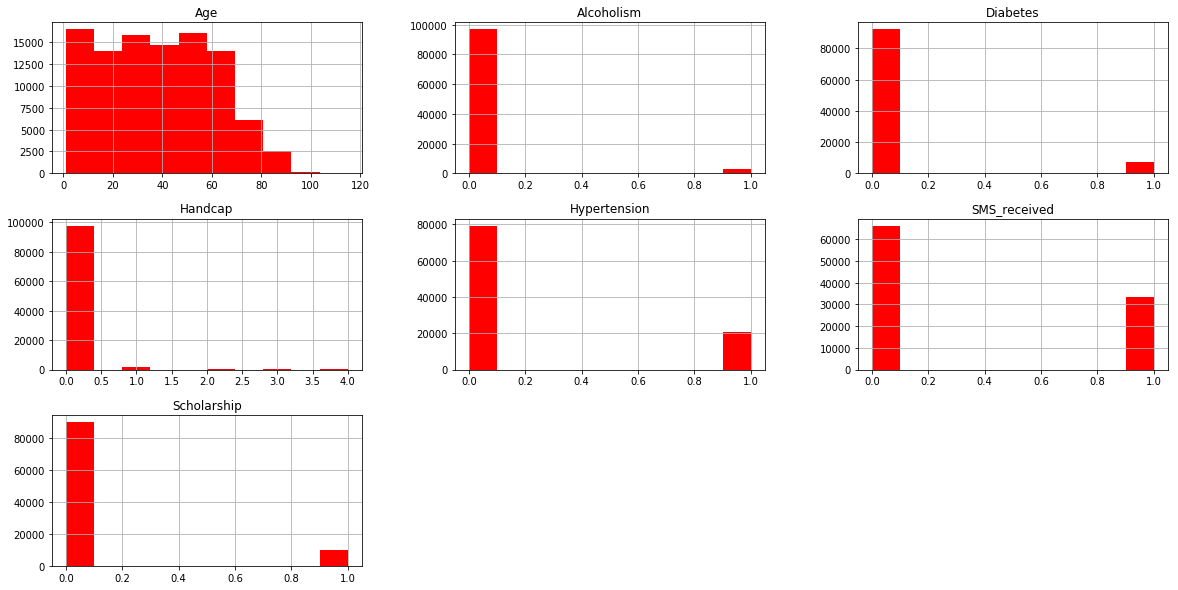

In [40]:
df.hist(figsize=(20,10),color='red');

##### the above plote Shows the data of columns: Age, Scholarship, Hypertension, Diabetes, Alcoholism, Handcap,  SMS_received.

### ََTo make good comparisons we need to split the data based on  attendance: 

In [41]:
came=df.attendance== 'finished'
notcame=df.attendance== 'not_came'
df[came].count(), df[notcame].count()

(Gender            79262
 AppointmentDay    79262
 Age               79262
 Neighbourhood     79262
 Scholarship       79262
 Hypertension      79262
 Diabetes          79262
 Alcoholism        79262
 Handcap           79262
 SMS_received      79262
 attendance        79262
 dtype: int64, Gender            20477
 AppointmentDay    20477
 Age               20477
 Neighbourhood     20477
 Scholarship       20477
 Hypertension      20477
 Diabetes          20477
 Alcoholism        20477
 Handcap           20477
 SMS_received      20477
 attendance        20477
 dtype: int64)

##### the above table shows  the differences between those who attended the appointment and those who did not, and its relationship to other variables.

In [42]:
df[came].mean(), df[notcame].mean()

(Age             39.058389
 Scholarship      0.096112
 Hypertension     0.212990
 Diabetes         0.077263
 Alcoholism       0.028109
 Handcap          0.023176
 SMS_received     0.305178
 dtype: float64, Age             35.454803
 Scholarship      0.117547
 Hypertension     0.175123
 Diabetes         0.066709
 Alcoholism       0.031108
 Handcap          0.019778
 SMS_received     0.456708
 dtype: float64)

##### the above table shows  the averag (mean) of number of  variables for  those who attended the appointment and those who did not.

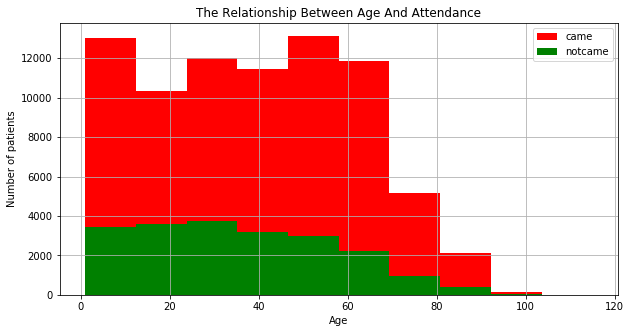

In [43]:
def attendance (df,col_name,came,notcame):
    plt.figure(figsize=[10,5])
    df[col_name][came].hist(bins=10,color='red',label='came')
    df[col_name][notcame].hist(bins=10,color='green',label='notcame')
    plt.legend();
    plt.title('The Relationship Between Age And Attendance')
    plt.xlabel('Age')
    plt.ylabel('Number of patients');
attendance(df,'Age',came,notcame)

##### the above plote shows the relationship between age and attendance.

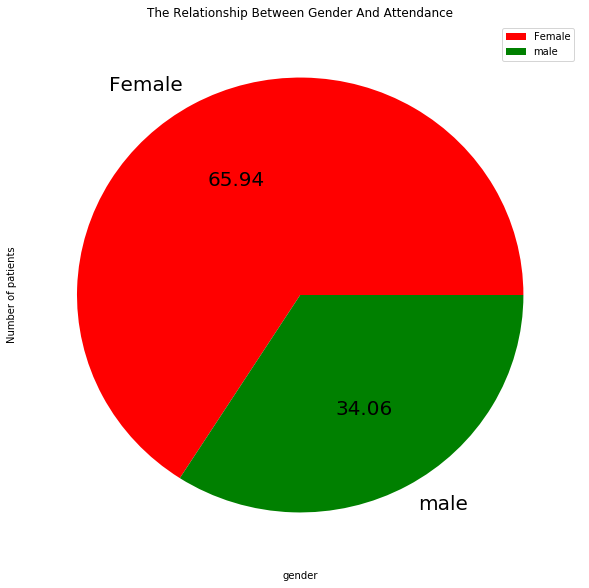

In [44]:
def attendance (df,col_name,came,notcame):
    plt.figure(figsize=[10,10])
    df[col_name][came].value_counts(normalize=True).plot(kind='pie',labels=['Female', 'male'], colors=['r', 'g'], autopct='%.2f', fontsize=20) 
    plt.legend();
    plt.title('The Relationship Between Gender And Attendance')
    plt.xlabel('gender')
    plt.ylabel('Number of patients');
attendance(df,'Gender',came,notcame)

##### the above plote shows the relationship between gender and attendance.

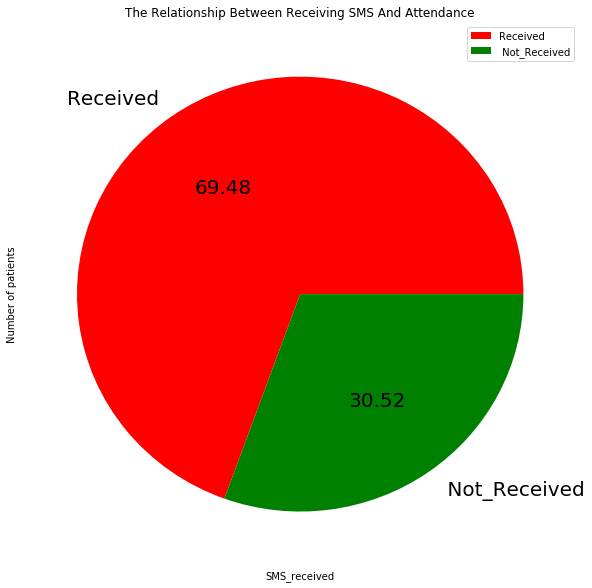

In [45]:
def attendance (df,col_name,came,notcame):
    plt.figure(figsize=[10,10])
    df[col_name][came].value_counts(normalize=True).plot(kind='pie',labels=['Received', ' Not_Received'], colors=['r', 'g'], autopct='%.2f', fontsize=20) 
    plt.legend();
    plt.title('The Relationship Between Receiving SMS And Attendance')
    plt.xlabel('SMS_received')
    plt.ylabel('Number of patients');
attendance(df,'SMS_received',came,notcame)


##### the above plote Shows the relationship between receiving SMS and attendance

<a id='conclusions'></a>
## Conclusions

### Results:

1. Patients' ages for the most commitment to attend the appointment ranged from approximately: 1 to 17, 23 to 37, and 50 to 58, while in other age groups it was less.
2. Attendance was lowest in ages 70 to 100.

3. The number of registered females and who attended the appointment is double the number of males. 66% compared to 34%. 

4. Receiving messages affects attendance, as the number of attendees increased when receiving SMS messages compared to attendance from those who did not receive SMS. 

5. Overall Those who did not receive text messages almost doubled those who received text messages. 

6. Most of the registrants were young.

7. Most of the registrants are not registered with health insurance.

8. The majority of those registered do not use alcohol, do not Hypertension  or diabetes, and are not handcap.

8. Actions should be taken to send SMS reminders to attend the appointment.

9. Future research and additional data are required about physicians and the type of clinics that are most attended by patients.

### limitations: 

- There was a limitation about specifying the clinics to which the attendees are directed and which or to which they are appointed.


